In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

# Create a ``MMPTree`` for a given signal

## MMP pour ``sparsity_level = 4`` pour l'``id = 2133``

In [3]:
signal_dict = workbench.signalDictFromId(id=2133)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=4, connections=4)

In [4]:
mmp_tree.runMMPDF(branches_number=5, verbose=True)

>> Branch n°1 exploring path : (1, 1, 1, 1)
>> Branch n°2 exploring path : (2, 1, 1, 1)
>> Branch n°3 exploring path : (3, 1, 1, 1)
>> Branch n°4 exploring path : (4, 1, 1, 1)
>> Branch n°5 exploring path : (1, 2, 1, 1)
>> Branch n°6 exploring path : (2, 2, 1, 1)
>> Branch n°7 exploring path : (3, 2, 1, 1)
>> Branch n°8 exploring path : (4, 2, 1, 1)
>> Branch n°9 exploring path : (1, 3, 1, 1)
>> Branch n°10 exploring path : (2, 3, 1, 1)
>> Branch n°11 exploring path : (3, 3, 1, 1)
>> Branch n°12 exploring path : (4, 3, 1, 1)
>> Branch n°13 exploring path : (1, 4, 1, 1)
>> Branch n°14 exploring path : (2, 4, 1, 1)
>> Branch n°15 exploring path : (3, 4, 1, 1)
>> Branch n°16 exploring path : (4, 4, 1, 1)
>> Branch n°17 exploring path : (1, 1, 2, 1)
>> Branch n°18 exploring path : (2, 1, 2, 1)
>> Branch n°19 exploring path : (3, 1, 2, 1)
>> Branch n°20 exploring path : (4, 1, 2, 1)
>> Branch n°21 exploring path : (1, 2, 2, 1)
>> Branch n°22 exploring path : (2, 2, 2, 1)
>> Branch n°23 expl

In [5]:
mmp_tree.printLeaves()

Branch n°1 leaf with MSE = 0.00039995690300025327
Branch n°2 leaf with MSE = 0.0005893349773967863
Branch n°3 leaf with MSE = 0.0005163675838060643
Branch n°4 leaf with MSE = 0.0005360799409442138
Branch n°5 leaf with MSE = 0.0004046149233376321
Branch n°6 leaf with MSE = 0.0005226247700325981
Branch n°7 leaf with MSE = 0.0004846536805961871
Branch n°8 leaf with MSE = 0.0005122774520202991
Branch n°9 leaf with MSE = 0.0006281184381391441
Branch n°10 leaf with MSE = 0.0007147004476673457
Branch n°11 leaf with MSE = 0.0006950279618015502
Branch n°12 leaf with MSE = 0.00039995690300025327
Branch n°13 leaf with MSE = 0.0005893349773967863
Branch n°14 leaf with MSE = 0.0005299921071795324
Branch n°15 leaf with MSE = 0.0006007989282376925
Branch n°16 leaf with MSE = 0.0005084230929262633
Branch n°17 leaf with MSE = 0.0005144698542659112
Branch n°18 leaf with MSE = 0.0007110514242861398
Branch n°19 leaf with MSE = 0.0006456017735161528
Branch n°20 leaf with MSE = 0.0005414511904609226
Branch 

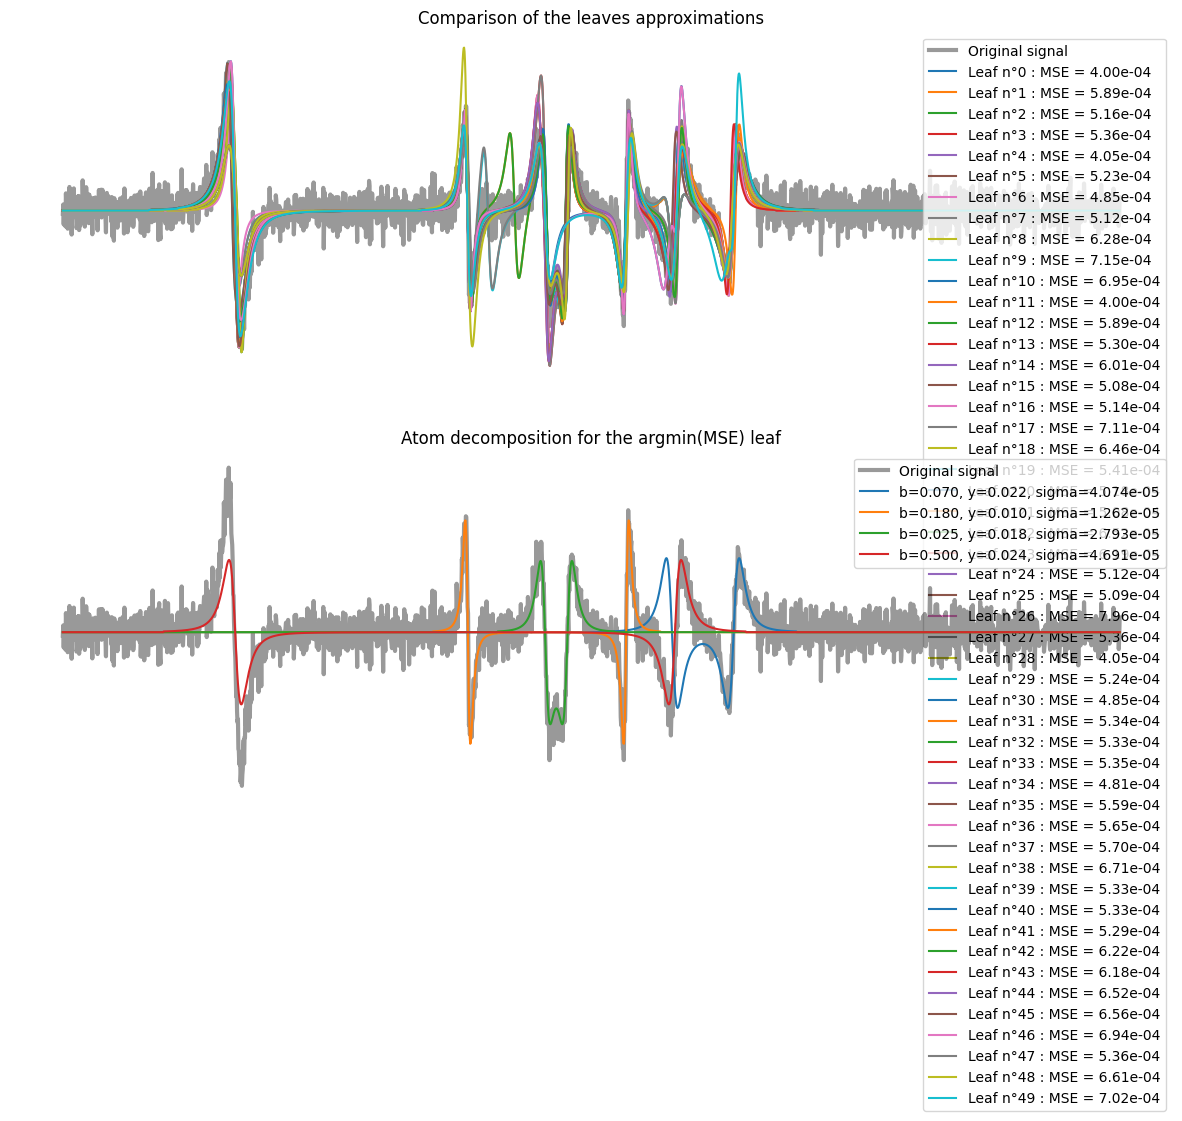

In [6]:
mmp_tree.plotLeavesComparison()

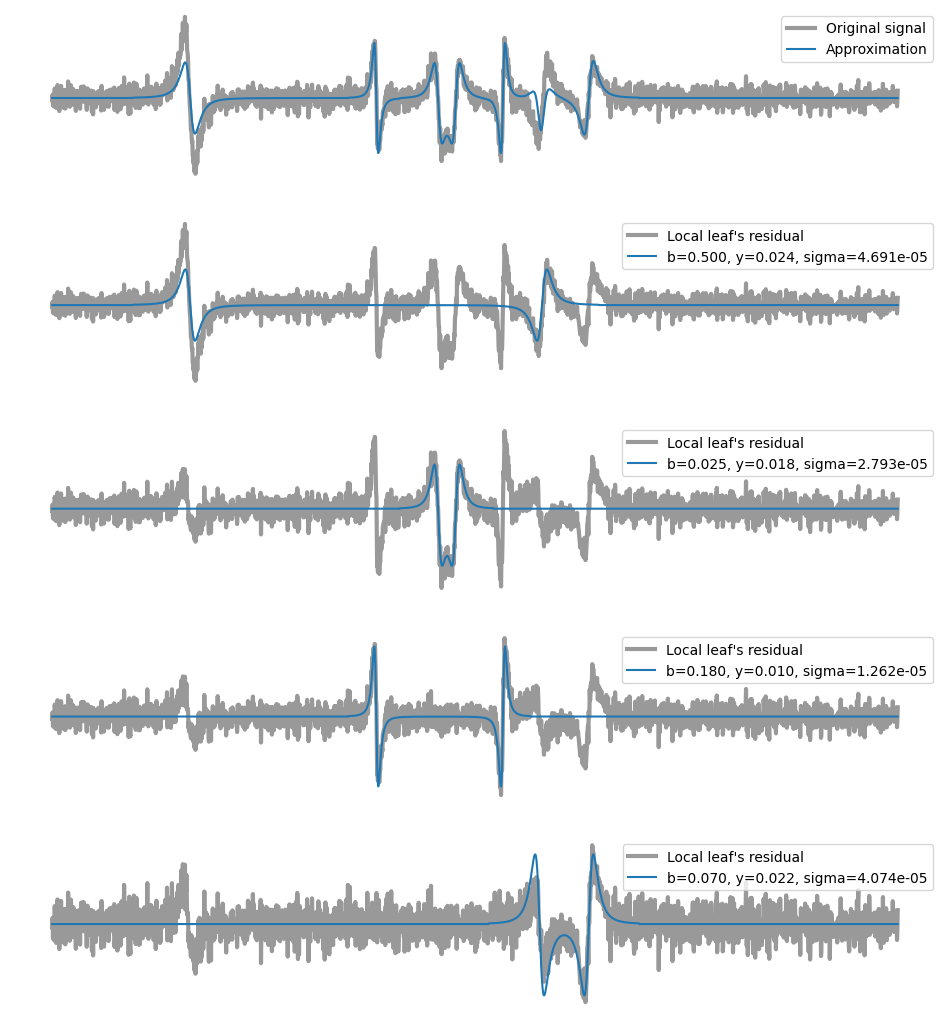

In [8]:
mmp_tree.plotLeafDecomposition(0)

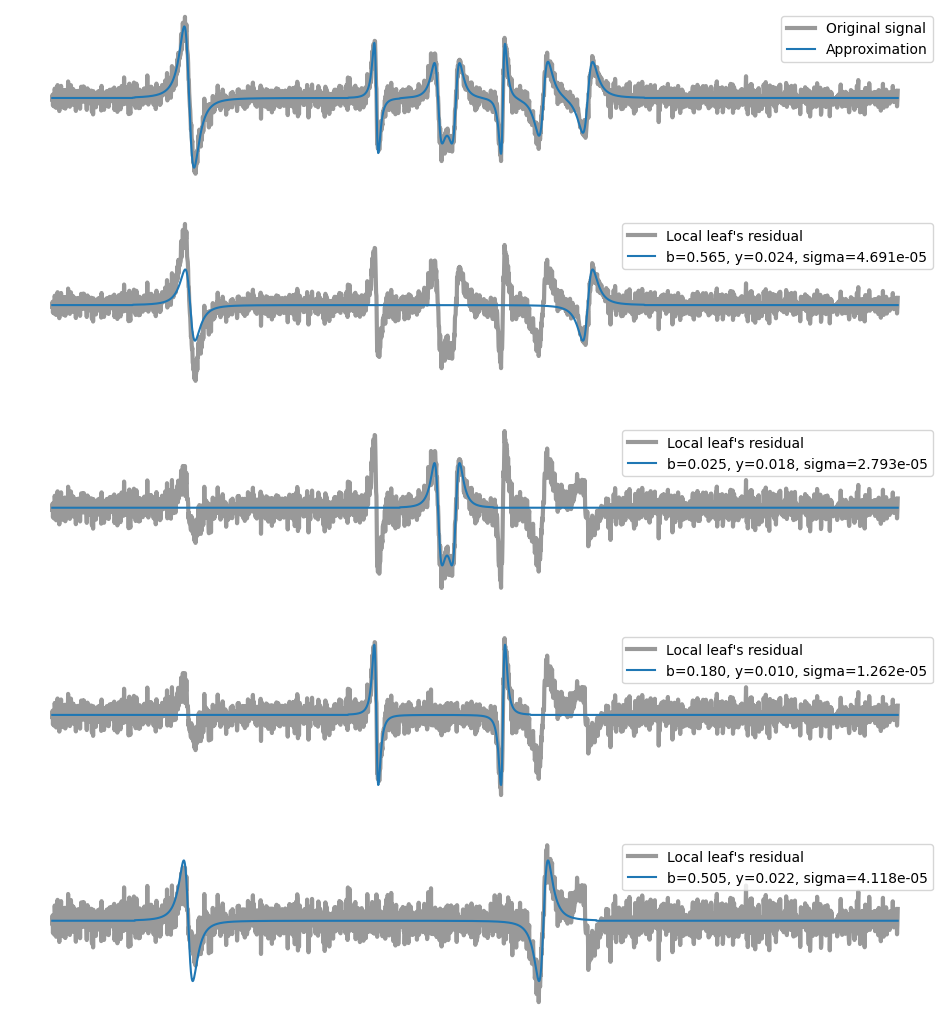

In [7]:
mmp_tree.plotLeafDecomposition(4)

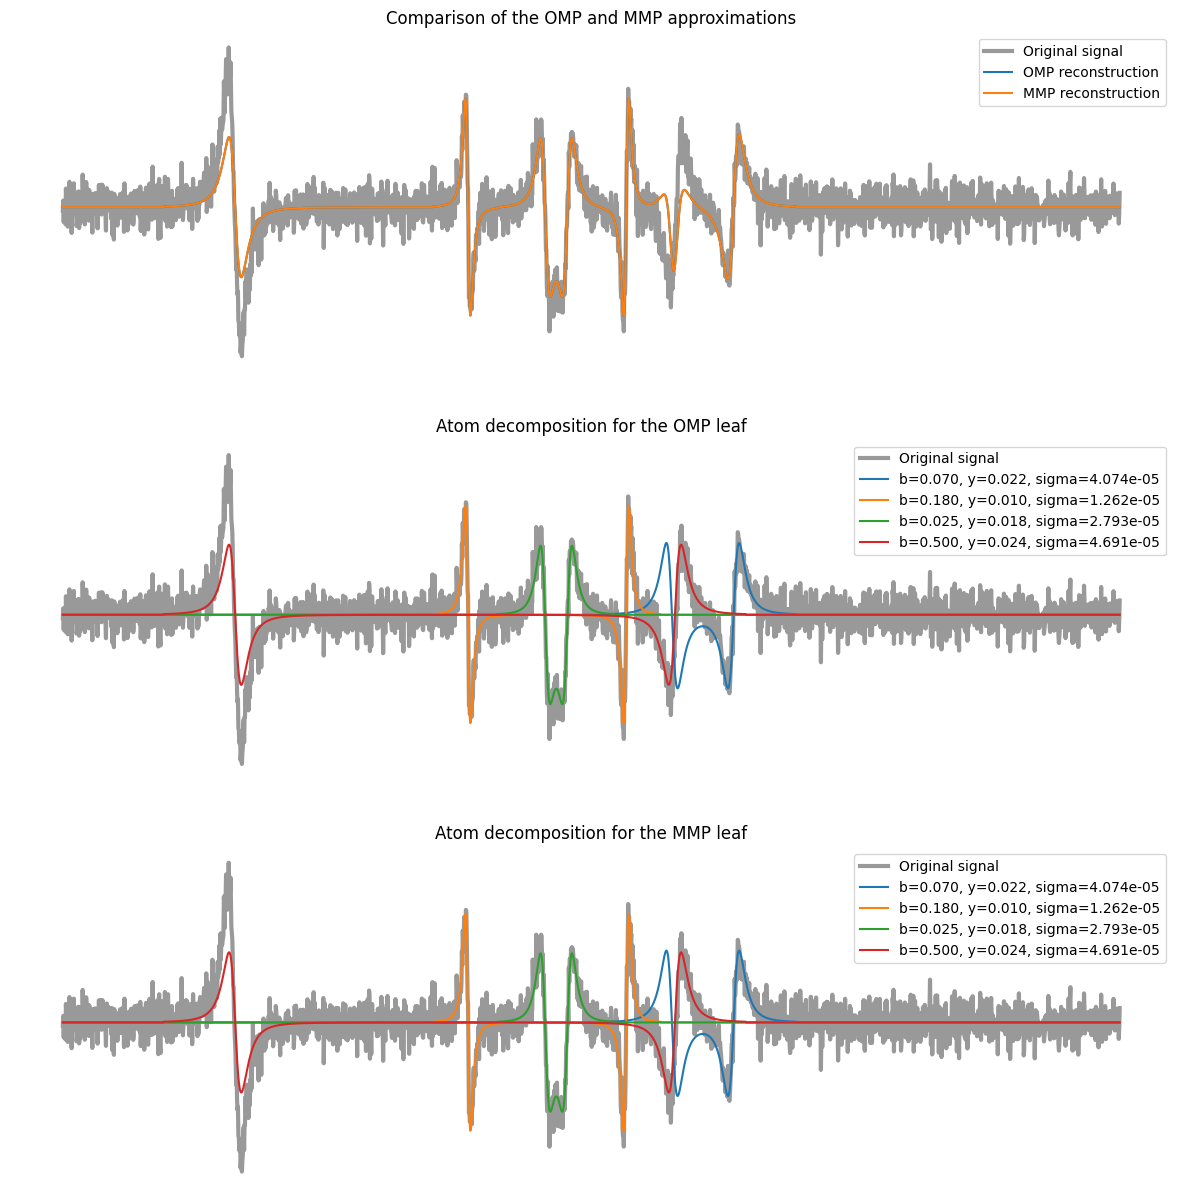

In [9]:
mmp_tree.plotOMPComparison()